In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import dataframe_image as dfi
import math

In [2]:
pd.set_option('display.float_format', lambda x: '%.9f' % x)

In [3]:
# Es importante mencionar que esta base de datos proviene de la última actualización en el Banco de Información de Telecomunicaciones
# del IFT, consultado el 19 de agosto de 2022. 
# Por este motivo se incluye en este repositorio esa versión de la base de datos a efectos de que si desea replicar el 
# resultado, lo haga con este conjunto de datos, toda vez que la información en el BIT podría variar sin previo aviso.

ingresos = pd.read_csv('ingresos_2021.csv', encoding ='utf-8')
ingresos

,FOLIO,ANIO,TRIM,FECHA,CONCESIONARIO,K_EMPRESA,EMPRESA,K_GRUPO,GRUPO,I_FIJO_MOVIL,INGRESOS_TOTAL_E
0,100028,2021,4,15DEC2021,ADOLFO MERINO MEDINA,C0089,CABLEMAS,G004,GRUPO TELEVISA,Fijo,434431.000000000
1,100029,2021,4,15DEC2021,AGUSTIN PEREZ VIEYRA,C0009,AGUSTIN PEREZ VIEYRA,C009,AGUSTIN PEREZ VIEYRA,Fijo,682018.800000000
2,100065,2021,4,15DEC2021,ARELY ISABEL GONGORA PECH,C0046,ARELY ISABEL GONGORA PECH,C046,ARELY ISABEL GONGORA PECH,Fijo,1149516.000000000
3,100142,2021,4,15DEC2021,FRANCISCO GUERRA GARCIA,C0666,FRANCISCO GUERRA GARCIA,C666,FRANCISCO GUERRA GARCIA,FIJO,1947843.000000000
4,100147,2021,4,15DEC2021,GABRIEL BUTRON CHIAPA,C0199,GABRIEL BUTRON CHIAPA,C199,GABRIEL BUTRON CHIAPA,Fijo,1109813.000000000
...,...,...,...,...,...,...,...,...,...,...,...
128,519163,2021,4,15DEC2021,"CONVERGENCIA Y DESARROLLO DIGITAL, S.A. DE C.V.",C0807,RED DOG,C807,RED DOG,Fijo y OMV,1460571.890000000
129,519208,2021,4,15DEC2021,"TELMOV MOVIL, S.A. DE C.V.",C0080,TELMOVIL,C080,TELMOVIL,OMV,188109.280000000
130,519363,2021,4,15DEC2021,"MARKETING 358, S.A. DE C.V.",C0473,MARKETING 358,C473,MARKETING 358,OMV,1924097.070000000
131,519422,2021,4,15DEC2021,"BROCOMUNICACIONES MOVILES, S.A.P.I. DE C.V.",C0511,BROMOVIL,C511,BROMOVIL,OMV,237150.700000000


In [4]:
ingresos['GRUPO'].unique()

array(['GRUPO TELEVISA', 'AGUSTIN PEREZ VIEYRA',
       'ARELY ISABEL GONGORA PECH', 'FRANCISCO GUERRA GARCIA',
       'GABRIEL BUTRON CHIAPA', 'GUILLERMO MEDELLIN MILAN',
       'GUILLERMO ZARATE GARCIA', 'ISALIA MORENO ZETINA',
       'JAIME SANCHEZ SANCHEZ', 'JESUS MIGUEL FERNANDEZ GUERRERO',
       'JOSE JULIAN SACRAMENTO GARZA', 'MANUEL LOPEZ AVILA',
       'MARCO ANTONIO ROSALES HERRERA', 'ROBERTO LOPEZ BRAVO',
       'SARA QUIROZ CHAPA', 'TV-K', 'TELECAB', 'STARGROUP',
       'MEGACABLE-MCM', 'TELESISTEMAS PENINSULARES', 'AXTEL', 'GLOBALSAT',
       'TELECOM NACIONAL', 'TOTALPLAY', 'HISPASAT', 'AIRECABLE',
       'USA TELECOM', 'COMCAB', 'SINOTECA',
       'COORDINADORA DE TV POR CABLE', 'TV OJO CALIENTE', 'AMERICA MOVIL',
       'TELECABLE DE TICUL', 'EUTELSAT AMERICAS', 'MARCATEL',
       'LINK TE CONECTAMOS', 'ELARA COMUNICACIONES',
       'CABLEVISION DE APATZINGAN', 'MVS', 'MAXICABLE', 'BT LATAM MEXICO',
       'TELECABLE DE COAHUAYANA', 'TELEFONICA', 'OUI',
       'VERIZON

In [5]:
len(ingresos['GRUPO'].unique())

115

In [6]:
ingresos[ingresos['INGRESOS_TOTAL_E'].isna()==True]

,FOLIO,ANIO,TRIM,FECHA,CONCESIONARIO,K_EMPRESA,EMPRESA,K_GRUPO,GRUPO,I_FIJO_MOVIL,INGRESOS_TOTAL_E
20,100443,2021,4,15DEC2021,"AXTEL, S.A.B. DE C.V.",C0055,AXTEL,G009,AXTEL,Fijo,NaN
79,106830,2021,4,15DEC2021,"VIRGIN MOBILE MEXICO, S. DE R.L. DE C.V.",C0629,VIRGIN MOBILE,C629,VIRGIN MOBILE,OMV,NaN
86,107206,2021,4,15DEC2021,"KUBO CEL, S.A.P.I. DE C.V.",C0323,QBO CEL,C323,QBO CEL,OMV,NaN
98,501907,2021,4,15DEC2021,"VALOR AGREGADO DIGITAL, S.A. DE C.V.",C0734,VADSA,C734,VADSA,Fijo,NaN


In [7]:
ingresos.dtypes

FOLIO                 int64
ANIO                  int64
TRIM                  int64
FECHA                object
CONCESIONARIO        object
K_EMPRESA            object
EMPRESA              object
K_GRUPO              object
GRUPO                object
I_FIJO_MOVIL         object
INGRESOS_TOTAL_E    float64
dtype: object

In [8]:
ingresos_por_grupo = ingresos[['CONCESIONARIO', 'GRUPO', 'INGRESOS_TOTAL_E']]
ingresos_por_grupo

,CONCESIONARIO,GRUPO,INGRESOS_TOTAL_E
0,ADOLFO MERINO MEDINA,GRUPO TELEVISA,434431.000000000
1,AGUSTIN PEREZ VIEYRA,AGUSTIN PEREZ VIEYRA,682018.800000000
2,ARELY ISABEL GONGORA PECH,ARELY ISABEL GONGORA PECH,1149516.000000000
3,FRANCISCO GUERRA GARCIA,FRANCISCO GUERRA GARCIA,1947843.000000000
4,GABRIEL BUTRON CHIAPA,GABRIEL BUTRON CHIAPA,1109813.000000000
...,...,...,...
128,"CONVERGENCIA Y DESARROLLO DIGITAL, S.A. DE C.V.",RED DOG,1460571.890000000
129,"TELMOV MOVIL, S.A. DE C.V.",TELMOVIL,188109.280000000
130,"MARKETING 358, S.A. DE C.V.",MARKETING 358,1924097.070000000
131,"BROCOMUNICACIONES MOVILES, S.A.P.I. DE C.V.",BROMOVIL,237150.700000000


In [9]:
ingresos_por_grupo.isna().sum()

CONCESIONARIO       0
GRUPO               0
INGRESOS_TOTAL_E    4
dtype: int64

In [10]:
ingresos_por_grupo['GRUPO'].unique()

array(['GRUPO TELEVISA', 'AGUSTIN PEREZ VIEYRA',
       'ARELY ISABEL GONGORA PECH', 'FRANCISCO GUERRA GARCIA',
       'GABRIEL BUTRON CHIAPA', 'GUILLERMO MEDELLIN MILAN',
       'GUILLERMO ZARATE GARCIA', 'ISALIA MORENO ZETINA',
       'JAIME SANCHEZ SANCHEZ', 'JESUS MIGUEL FERNANDEZ GUERRERO',
       'JOSE JULIAN SACRAMENTO GARZA', 'MANUEL LOPEZ AVILA',
       'MARCO ANTONIO ROSALES HERRERA', 'ROBERTO LOPEZ BRAVO',
       'SARA QUIROZ CHAPA', 'TV-K', 'TELECAB', 'STARGROUP',
       'MEGACABLE-MCM', 'TELESISTEMAS PENINSULARES', 'AXTEL', 'GLOBALSAT',
       'TELECOM NACIONAL', 'TOTALPLAY', 'HISPASAT', 'AIRECABLE',
       'USA TELECOM', 'COMCAB', 'SINOTECA',
       'COORDINADORA DE TV POR CABLE', 'TV OJO CALIENTE', 'AMERICA MOVIL',
       'TELECABLE DE TICUL', 'EUTELSAT AMERICAS', 'MARCATEL',
       'LINK TE CONECTAMOS', 'ELARA COMUNICACIONES',
       'CABLEVISION DE APATZINGAN', 'MVS', 'MAXICABLE', 'BT LATAM MEXICO',
       'TELECABLE DE COAHUAYANA', 'TELEFONICA', 'OUI',
       'VERIZON

In [11]:
# Agrupados

ingresos_agrupados = ingresos_por_grupo.groupby(['GRUPO']).sum()
ingresos_agrupados

,INGRESOS_TOTAL_E
GRUPO,
ADDINTELI,2462635.000000000
AGUSTIN PEREZ VIEYRA,682018.800000000
AIRECABLE,3155850.880000000
ALTAN,862839373.799999952
AMERICA MOVIL,86559324650.000000000
...,...
VERIZON SERVICIOS EMPRESARIALES MEXICO,94305990.109999999
VIRGIN MOBILE,0.000000000
WEEX,8026895.340000000


In [12]:
ingresos_agrupados = ingresos_agrupados.reset_index().sort_values(by=['INGRESOS_TOTAL_E'], ascending=False)
ingresos_agrupados

,GRUPO,INGRESOS_TOTAL_E
4,AMERICA MOVIL,86559324650.000000000
36,GRUPO TELEVISA,18486354922.599998474
6,AT&T,14680526078.000000000
97,TELEFONICA,6655353072.000000000
59,MEGACABLE-MCM,6433334578.199999809
...,...,...
18,COMNET,16234.890000000
68,QBO CEL,0.000000000
108,VADSA,0.000000000
111,VIRGIN MOBILE,0.000000000


In [13]:
ingresos_agrupados.sort_values(by=['INGRESOS_TOTAL_E'], ascending=False)

,GRUPO,INGRESOS_TOTAL_E
4,AMERICA MOVIL,86559324650.000000000
36,GRUPO TELEVISA,18486354922.599998474
6,AT&T,14680526078.000000000
97,TELEFONICA,6655353072.000000000
59,MEGACABLE-MCM,6433334578.199999809
...,...,...
18,COMNET,16234.890000000
68,QBO CEL,0.000000000
108,VADSA,0.000000000
111,VIRGIN MOBILE,0.000000000


In [14]:
ingresos_agrupados.dtypes

GRUPO                object
INGRESOS_TOTAL_E    float64
dtype: object

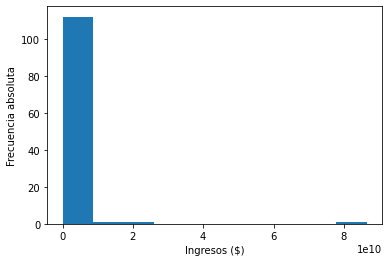

NormaltestResult(statistic=233.49963689785488, pvalue=1.9778715539748704e-51)


In [15]:
plt.hist(ingresos_agrupados['INGRESOS_TOTAL_E'])
plt.xlabel('Ingresos ($)')
plt.ylabel('Frecuencia absoluta')
plt.show()
print(sts.normaltest(ingresos_agrupados['INGRESOS_TOTAL_E'])) # no pasa la prueba de normalidad (sesgo)

In [16]:
# cuántos ceros tenemos en las cifras
m = ingresos_agrupados[ingresos_agrupados['INGRESOS_TOTAL_E']!=0]

ingresos_agrupados_transformables = m

ingresos_agrupados_transformables

,GRUPO,INGRESOS_TOTAL_E
4,AMERICA MOVIL,86559324650.000000000
36,GRUPO TELEVISA,18486354922.599998474
6,AT&T,14680526078.000000000
97,TELEFONICA,6655353072.000000000
59,MEGACABLE-MCM,6433334578.199999809
...,...,...
50,JAIME SANCHEZ SANCHEZ,125171.000000000
35,GRUPO CORPORATIVO ZUNUN PAZ,88182.000000000
23,EDUARDO PEDRERO PEREZ,68200.000000000
45,IGOU TELECOM,61997.030000000


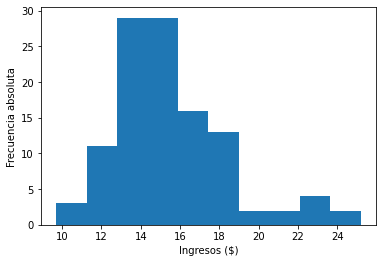

NormaltestResult(statistic=21.632204966257444, pvalue=2.0073651306486227e-05)


In [17]:
# Aplicar logarítmos para reducir el efecto de la magnitud de los datos.
ln_ingresos = np.log(ingresos_agrupados_transformables['INGRESOS_TOTAL_E']) 

plt.hist(ln_ingresos)
plt.xlabel('Ingresos ($)')
plt.ylabel('Frecuencia absoluta')
plt.show()
print(sts.normaltest(ln_ingresos))

In [18]:
# Análisis de varianza
var_numpy = np.var(ln_ingresos, ddof = 0)
print(f"La varianza del ln de los ingresos totales en 2021 es de {var_numpy}")
print(f'Lo que implica $ {np.exp(var_numpy)}')

sd_numpy = np.std(ln_ingresos,ddof = 0)
print(f"La desviación estándar del ln de los ingresos totales en 2021 es de {sd_numpy}")
print(f'Lo que implica $ {np.exp(sd_numpy)}')

La varianza del ln de los ingresos totales en 2021 es de 8.161543088808147
Lo que implica $ 3503.5887833098686
La desviación estándar del ln de los ingresos totales en 2021 es de 2.8568414532150967
Lo que implica $ 17.40646089692635


In [19]:
var_numpy2 = np.var(ingresos_agrupados['INGRESOS_TOTAL_E'], ddof = 0)
print(f"La varianza del ln de los ingresos totales en 2021 es de {var_numpy2}")

sd_numpy2 = np.std(ingresos_agrupados['INGRESOS_TOTAL_E'],ddof = 0)
print(f"La desviación estándar de los ingresos totales en 2021 es de {sd_numpy2}")


La varianza del ln de los ingresos totales en 2021 es de 6.954432020350234e+19
La desviación estándar de los ingresos totales en 2021 es de 8339323725.788701


In [20]:
# La media
media = np.mean(ln_ingresos)
print(f"La media del ln de los ingresos 2021 es de {media}")
print(f'Lo que implica una media de $ {np.exp(media)}')

La media del ln de los ingresos 2021 es de 15.505036713719937
Lo que implica una media de $ 5416913.323709276


In [21]:
# Calculando la regla de 68-95-99.7 usando la desviación estándar:
print(f"Casi el 68% de los datos está entre {round(media-sd_numpy,3)} y {round(media+sd_numpy,3)}")
print(f'Lo que implica que el 68% de los operadores tienen ingresos entre {round(np.exp(media-sd_numpy),2)} y {round(np.exp(media+sd_numpy),2)}')
print(f"Casi el 95% de los datos está entre {round(media-2*sd_numpy,3)} y {round(media +2*sd_numpy,3)}")
print(f'Lo que implica que el 95% de los operadores tienen ingresos entre {round(np.exp(media-2*sd_numpy),2)} y {round(np.exp(media +2*sd_numpy),2)}')
print(f"Casi el 99.7% de los datos está entre {round(media-3*sd_numpy,3)} y {round(media+3*sd_numpy,3)}")
print(f'Lo que implica que el 99.7% de los operadores tienen ingresos entre {round(np.exp(media-3*sd_numpy),2)} y {round(np.exp(media +3*sd_numpy),2)}')


Casi el 68% de los datos está entre 12.648 y 18.362
Lo que implica que el 68% de los operadores tienen ingresos entre 311201.3 y 94289289.95
Casi el 95% de los datos está entre 9.791 y 21.219
Lo que implica que el 95% de los operadores tienen ingresos entre 17878.49 y 1641242838.53
Casi el 99.7% de los datos está entre 6.935 y 24.076
Lo que implica que el 99.7% de los operadores tienen ingresos entre 1027.12 y 28568229291.31


In [22]:
# El score z nos dice el número de desviaciones estándar en el que un dato de ingreso está cerca de la media
z_scipy = sts.zscore(ln_ingresos)
print(f"Los score z es {z_scipy}")

Los score z es [ 3.38802811e+00  2.84764211e+00  2.76695473e+00  2.49004040e+00
  2.47816417e+00  2.46481632e+00  1.89516124e+00  1.77493308e+00
  1.53574340e+00  1.26262392e+00  1.17937240e+00  1.16376176e+00
  1.12719817e+00  1.11912495e+00  1.08072800e+00  1.00006199e+00
  9.84196858e-01  9.38156552e-01  9.26375545e-01  9.01980800e-01
  8.73719904e-01  7.68933362e-01  7.43418360e-01  6.34973511e-01
  6.20057722e-01  4.94084768e-01  4.86886634e-01  4.82834161e-01
  4.35611612e-01  3.54072003e-01  3.41514421e-01  3.33457492e-01
  3.33457492e-01  3.24081227e-01  2.82810286e-01  2.45070153e-01
  2.23317822e-01  1.83826946e-01  1.37659605e-01  1.25169767e-01
  8.98356625e-02  5.53450294e-02  5.02174083e-02  3.22674461e-02
  7.68880317e-03  2.83579110e-03  1.43165950e-03 -3.78826762e-02
 -7.44278824e-02 -9.78433998e-02 -1.15082756e-01 -1.23020783e-01
 -1.30067312e-01 -1.69401594e-01 -1.76578472e-01 -1.84015421e-01
 -1.89113751e-01 -2.21709569e-01 -2.23655258e-01 -2.43421878e-01
 -2.591398

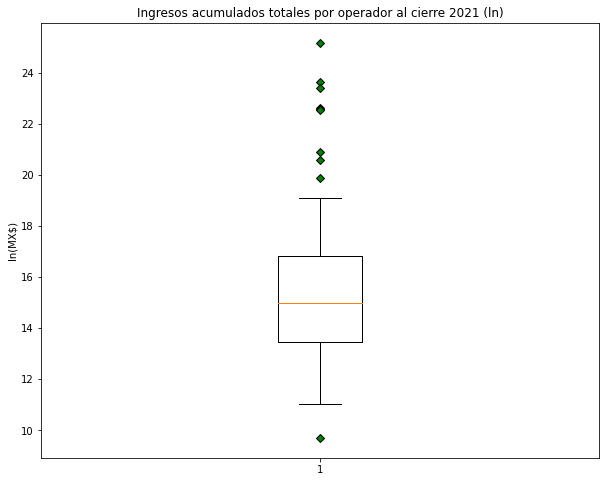

In [23]:
# Prueba de outliers (los grandes operadores)
green_diamond = dict(markerfacecolor='g', marker='D')
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.set_title('Ingresos acumulados totales por operador al cierre 2021 (ln)')
ax1.set_ylabel('ln(MX$)')
ax1.boxplot(ln_ingresos, flierprops=green_diamond, whis=0.75)
plt.savefig('criterio_2021.png')
plt.show()

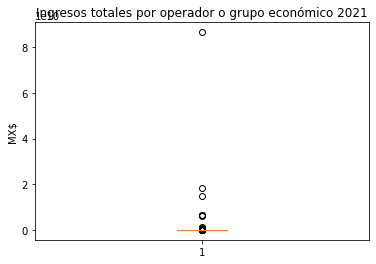

In [24]:
# Prueba de outliers (los grandes operadores)

fig1, ax1 = plt.subplots()
ax1.set_title('Ingresos totales por operador o grupo económico 2021')
ax1.set_ylabel('MX$')
ax1.boxplot(ingresos_agrupados['INGRESOS_TOTAL_E'])
plt.show()

In [25]:
# Análisis con quartiles y rango intercuantil para efectos de identificar los outliers

quartiles = ln_ingresos.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"El cuartil más bajo de los ingresos es: {lowerq}")
print(f"El cuartil más alto de los ingresos es: {upperq}")
print(f"El rango intercuantil de los ingresos es: {iqr}")
print(f"El ingreso medio es: {quartiles[0.5]} ")


lower_bound = lowerq - (1*iqr)
upper_bound = upperq + (1*iqr)
print(f"Valores por debajo {lower_bound} se consideran datos aberrantes.")
print(f"Valores por encima {upper_bound} se consideran datos aberrantes que no son elegibles para el Comité de Pequeños Operadores.")



El cuartil más bajo de los ingresos es: 13.47325074739342
El cuartil más alto de los ingresos es: 16.816963692511443
El rango intercuantil de los ingresos es: 3.343712945118023
El ingreso medio es: 14.979333832240032 
Valores por debajo 10.129537802275397 se consideran datos aberrantes.
Valores por encima 20.160676637629464 se consideran datos aberrantes que no son elegibles para el Comité de Pequeños Operadores.


In [26]:
print(f'Los ingresos extremadamente grandes son aquellos que son mayores o iguales a $ {np.exp(upper_bound)}')

Los ingresos extremadamente grandes son aquellos que son mayores o iguales a $ 569732002.7588253


In [32]:
# de la lista de operadores que tienen un ingreso menor al upper bound son:

# Los que quedan dentro del CPO
cpo = ingresos_agrupados_transformables[ingresos_agrupados_transformables['INGRESOS_TOTAL_E']<=569732002.7588253].sort_values(by=['INGRESOS_TOTAL_E'], ascending=False)
cpo

,GRUPO,INGRESOS_TOTAL_E
83,STARGROUP,435677179.000000000
55,MARCATEL,199665310.599999994
102,TRANSTELCO,157402483.000000000
67,OUI,150537012.199999988
43,HNS DE MEXICO,135605863.400000006
...,...,...
50,JAIME SANCHEZ SANCHEZ,125171.000000000
35,GRUPO CORPORATIVO ZUNUN PAZ,88182.000000000
23,EDUARDO PEDRERO PEREZ,68200.000000000
45,IGOU TELECOM,61997.030000000


In [28]:
len(cpo['GRUPO'])

103

In [33]:
no_cpo = ingresos_agrupados_transformables[ingresos_agrupados_transformables['INGRESOS_TOTAL_E']>569732002.7588253].sort_values(by=['INGRESOS_TOTAL_E'], ascending=False)
no_cpo

,GRUPO,INGRESOS_TOTAL_E
4,AMERICA MOVIL,86559324650.000000000
36,GRUPO TELEVISA,18486354922.599998474
6,AT&T,14680526078.000000000
97,TELEFONICA,6655353072.000000000
59,MEGACABLE-MCM,6433334578.199999809
101,TOTALPLAY,6192632691.000000000
61,MVS,1216461308.150000095
3,ALTAN,862839373.799999952


In [30]:
# Gap entre el mejor ingreso en los CPO y el peor ingreso en los que son descartados de pertenecer a los CPO.

#brecha_ingreso = 
brecha_ingreso = no_cpo["INGRESOS_TOTAL_E"].min() - cpo["INGRESOS_TOTAL_E"].max()
print(f'El monto que separa al operador que tiene el mayor ingreso y que es elegible para pertencer al CPO y el que tiene el ingreso más bajo en cuanto a los descartados es de ${brecha_ingreso}')

El monto que separa al operador que tiene el mayor ingreso y que es elegible para pertencer al CPO y el que tiene el ingreso más bajo en cuanto a los descartados es de $427162194.79999995


In [31]:
print(f'Esta brecha equivale al {(brecha_ingreso/np.exp(media))} veces de la media de la distribución')

Esta brecha esuivale al 78.85712199424619 veces de la media de la distribución


# ¿Qué empresas son las elegibles en el conjunto de información disponible en el BIT-IFT?